In [1]:
!pip install ppscore --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.6 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.


In [2]:
!pip install pandas==2.2.2 numpy==1.26.4

  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ppscore 1.3.0 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.2.2 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Δημιουργία δεδομένων
df = pd.DataFrame()
df["x"] = np.random.uniform(-2, 2, 1_000_000)
df["error"] = np.random.uniform(-0.5, 0.5, 1_000_000)
df["y"] = df["x"]**2 + df["error"]

In [10]:
#Αφαίρεση κατηγορικών μεταβλητών
df_num = df.select_dtypes(include="number")

In [11]:
#Υπολογισμός του πίνακα PPS μεταξύ όλων των στηλών
pps_matrix = pps.matrix(df_num)

In [12]:
matrix_df = pps_matrix[['x', 'y', 'ppscore']].pivot(columns='x', index ="y", values ='ppscore')

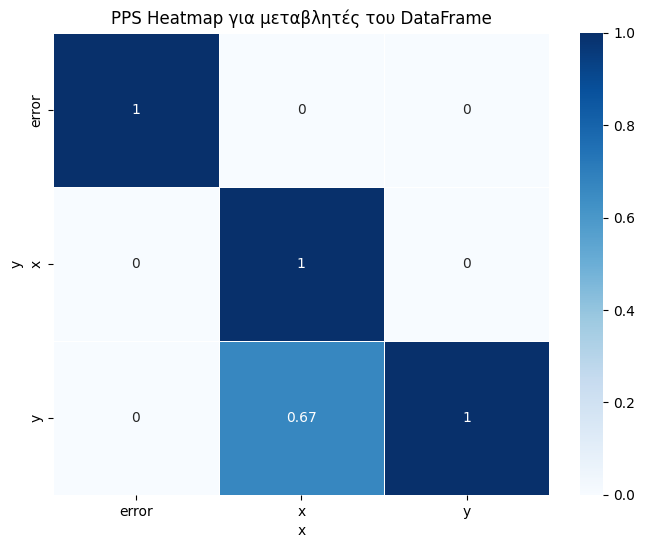

In [13]:
#Οπτικοποίηση των αποτελεσμάτων
pps_pivot = matrix_df

plt.figure(figsize=(8,6))

sns.heatmap(pps_pivot, cmap='Blues', vmin=0, vmax=1, annot=True, linewidths=0.5)

plt.title("PPS Heatmap για μεταβλητές του DataFrame")

plt.show()


<Axes: xlabel='x', ylabel='ppscore'>

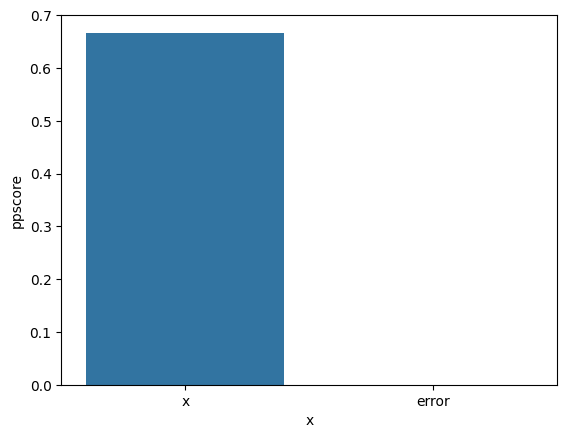

In [14]:
#Κώδικας feature selection σε σχέση με τη μεταβλητή y
predictors_df = pps.predictors(df, y="y")
sns.barplot(data=predictors_df, x="x", y="ppscore")